 <h1 align="center"> Online Payment Fraud Detection:</h1>

<h2 align="center"> A Data-Driven Machine Learning Project </h2>

### Introduction:
This project is a machine learning classification model to detect fraudulent transactions in online payments. The dataset used is highly imbalanced, with far more non-fraudulent transactions than fraudulent ones. The project explores multiple algorithms and techniques to address the imbalance and improve the detection of fraud.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings('ignore')  # To suppress warnings


## Data Loading

In [13]:

df = pd.read_csv('/kaggle/input/dataset/online_payment_frauds_dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [14]:
print("Rows and Columns")
print(df.shape)
df.head(5)

Rows and Columns
(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


##### Columns




In [15]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
df.rename(columns={'type':'transaction_type'},inplace=True)

In [17]:
# df.info()

In [18]:
# df.describe()

In [19]:
# df.head(2)

#### Class imbalance 

In [20]:
df['isFraud'].value_counts()

# We have class imbalance in the Fraudulent(1) transactions.

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [21]:
# cat_column = ['transaction_type','isFraud','isFlaggedFraud']

# for col in cat_column:
#     print(f"column => {col} = {df[col].unique()}")

#### Features:

## Data Cleaning

In [22]:
# print("Checking for NA Values")

# print(df.isna().sum())

In [23]:
# print("Checking for Duplicates")

# print(df.duplicated().sum())

### Box plots to visualize outliers

In [24]:
df.columns

Index(['step', 'transaction_type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [25]:
numeric_columns = df.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [26]:
# for col in numeric_columns:
#     plt.figure(figsize=(8,3))
#     sns.boxplot(data=df,x=df[col])
#     plt.show()

In [27]:
# for col in numeric_columns:
#     plt.figure(figsize=(9,2))
#     sns.histplot(data=df,x=df[col],bins=2)
#     plt.show()

In [28]:
# df.step.describe()

In [29]:
# df[['oldbalanceOrg','newbalanceOrig']].describe()

In [30]:
# df[['oldbalanceDest','newbalanceDest']].describe()

### Analyze categorical features

In [31]:
df.select_dtypes(exclude=['float64','int64']).columns

Index(['transaction_type', 'nameOrig', 'nameDest'], dtype='object')

In [32]:
df[['nameOrig','nameDest']].describe()

,nameOrig,nameDest
count,6362620,6362620
unique,6353307,2722362
top,C1902386530,C1286084959
freq,3,113


In [33]:
categorical_columns = df.select_dtypes(exclude=['float64','int64']).columns[0] # We will only use transaction type column as categorical because the otheer columns are unique identifiers.
categorical_columns

'transaction_type'

In [34]:
numeric_columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

## Exploratory Data Analysis

In [35]:
df.head(1)

,step,transaction_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0


In [36]:
numeric_columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [37]:
categorical_columns

'transaction_type'

In [38]:
# df.nameOrig.describe()

In [39]:
# transaction_count = df.groupby('transaction_type')['isFraud'].count().reset_index(name='no of transactions') \
#    .sort_values(by='no of transactions',ascending=False)

# sns.barplot(data=transaction_count,x='transaction_type',y='no of transactions',)
# plt.xlabel(" No of transactions ")
# plt.title(" Count of Transactions Per Transaction Type ")
# plt.ylabel(" Transaction Type")
# plt.show()

### Insights

1. Majority of the Transactions were done by withdrawal of money (CASH OUT) from account
2. Very less transactions are directly (DEBIT) made from the account

In [40]:
# fraud_count_df = df.groupby('transaction_type')['isFraud'].sum().reset_index() \
#      .sort_values(by='isFraud',ascending=False) 

# sns.barplot(data=fraud_count_df,x='transaction_type',y='isFraud')
# plt.title("Count of Fraudulent Transactions per Transaction Type")
# plt.xlabel("No of Fraud Transactions")
# plt.ylabel("Transaction_type")
# plt.show()

### Insights

1. Majortiy of the Fraudulent transaction's were either by (CASH OUT) withdrawal of money from the account or by Transfer of funds between two accounts (TRANSFER).

In [41]:
numeric_columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [42]:
# plt.figure(figsize=(8, 4))
# sns.kdeplot(np.log1p(df['amount'][df['isFraud'] == 0]), fill=True, label='default = 0')
# sns.kdeplot(np.log1p(df['amount'][df['isFraud'] == 1]), fill=True, label='default = 1')
# plt.title("Amount KDE Plot with isFraud as Hue (Log Scale)")
# plt.xlabel("Log(Amount)")
# plt.legend()
# plt.show()

#### Insights:

1. We can see that Transactions with higher amount have chances of beign FRAUDULENT.
2. Transactions with smaller amount tend to being NON-FRAUDULENT

In [43]:
numeric_columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [44]:
# cm = df[numeric_columns].corr()

# plt.figure(figsize=(10,4))
# sns.heatmap(cm,annot=True,fmt=".2f",cmap='coolwarm')
# plt.title("Co-relation matrix")
# plt.show()

### Insights from EDA.

1. Most of the transactions took place by CASH OUT , PAYMENT and CASH IN
2. Majority of the FRAUDULENT Transactions took place by CASH OUT or TRANSFER Transaction Type
3. Higher the Amount of Transaction, Higher the Risk of it being Fraud.


## Feature Engineering , Feature Selection

In [45]:
df.head(2)

,step,transaction_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0


#### Removing columns based on Domain knowledge

In [46]:
df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)

In [47]:
df.head(1)

,step,transaction_type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0


#### Scaling

In [48]:
# df_scaled = df.copy()

In [49]:
# cols_to_scale = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# scaler = RobustScaler()

# df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [50]:
# df_scaled.head(2)

# Feature Encoding

In [51]:
# df_scaled.head(1)

In [52]:
# df_scaled['transaction_type'] = df_scaled['transaction_type'].map({"CASH_OUT": 1, "PAYMENT": 2, 
#                                  "CASH_IN": 3, "TRANSFER": 4,
#                                  "DEBIT": 5})
# df_scaled.head(3)

In [53]:
# corelation_scaled = df_scaled.corr()
# print(corelation_scaled['isFraud'].sort_values(ascending=False))

In [54]:
df['transaction_type'] = df['transaction_type'].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
df.head(3)

,step,transaction_type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,2,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1


### Train Test Split

In [55]:
X = df[['transaction_type','amount','oldbalanceOrg','newbalanceOrig']]
y = df['isFraud']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Model Training

## Attempt 1:


#### Without handling Class Imbalance

In [56]:
# Created a function that takes model, train and test data and returns a classification report.

def get_report(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test,y_pred) 
    
    print(report)
    

In [57]:
get_report(LogisticRegression(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.87      0.36      0.51      2435

    accuracy                           1.00   1908786
   macro avg       0.93      0.68      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



In [58]:
get_report(DecisionTreeClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.86      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



In [60]:
# get_report(DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_split=30,random_state=42),X_train,y_train,X_test,y_test)

In [ ]:
# get_report(DecisionTreeClassifier(class_weight={0: 1, 1: 10},max_depth=10,min_samples_split=50,random_state=42),X_train,y_train,X_test,y_test)

In [63]:
get_report(RandomForestClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.87      0.89      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



### Insights:

LogiticRegression Model : recall = 0.36 , precision = 0.86

DecsionTreeClassifier Model : recall = 0.86 , precision =0.88

RandomForesClassifer Model : recall = 0.87, precision = 0.90

## Attempt 2:

#### Handling Class Imbalance using Smote, RandomUnderSampler Techniques:

#### Using SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smt = SMOTE(random_state=42)

X_resampled,y_resampled = smt.fit_resample(X,y)

In [ ]:
# get_report(LogisticRegression(),X_resampled,y_resampled,X_test,y_test)

In [ ]:
# get_report(DecisionTreeClassifier(),X_resampled,y_resampled,X_test,y_test)

In [ ]:
# get_report(XGBClassifier(),X_resampled,y_resampled,X_test,y_test)

In [66]:
get_report(RandomForestClassifier(),X_resampled,y_resampled,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       1.00      1.00      1.00      2435

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



#### Using RandomUnderSampler:

In [67]:
from imblearn.under_sampling import RandomUnderSampler

In [68]:
under_sampler= RandomUnderSampler(random_state=42)

X_under,y_under = under_sampler.fit_resample(X,y)

In [ ]:
# get_report(LogisticRegression(),X_under,y_under,X_test,y_test)

In [ ]:
# get_report(DecisionTreeClassifier(),X_under,y_under,X_test,y_test)

In [69]:
get_report(RandomForestClassifier(),X_under,y_under,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.12      1.00      0.22      2435

    accuracy                           0.99   1908786
   macro avg       0.56      1.00      0.61   1908786
weighted avg       1.00      0.99      0.99   1908786



## Model Fine Tuning

In [70]:
best_model = RandomForestClassifier()
best_model.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

threshold = 0.25

y_pred_custom = y_pred_prob >= threshold

print(classification_report(y_test,y_pred_custom))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.82      0.94      0.88      2435

    accuracy                           1.00   1908786
   macro avg       0.91      0.97      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



### Our Best model is RandomForestClassifier with recall 94% and precision 82%

# Model Evaluation Roc,Auc Curve:

In [74]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_custom)
fpr[:5], tpr [:5],thresholds[:5]

(array([0.        , 0.00025756, 1.        ]),
 array([0.        , 0.93921971, 1.        ]),
 array([2, 1, 0]))

In [75]:
auc_score = auc(fpr,tpr)
print(f"Area Under the Curve = {round(auc_score,2)}")

Area Under the Curve = 0.97


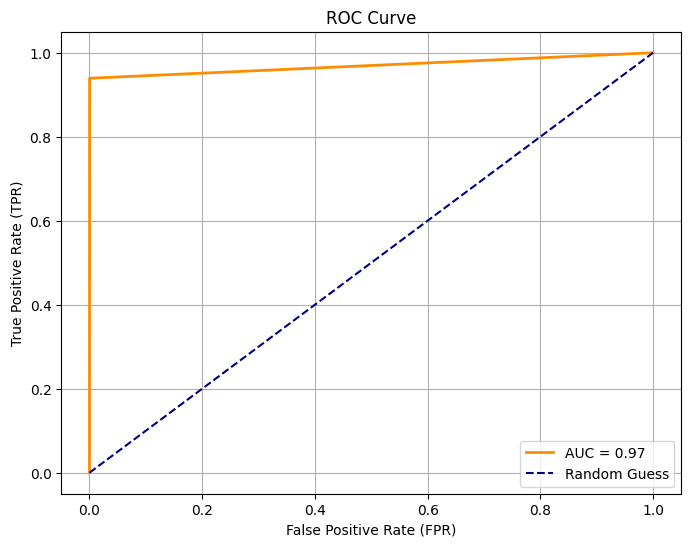

In [76]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [77]:
X.head(2)

,transaction_type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72


In [82]:
value = best_model.predict([[1,100023440,200000,25000]])
value
if value== 0:
    print("Not a Fraud")
else:
    print("Fraud")    

Not a Fraud


In [79]:
threshold

0.25

In [87]:
# import joblib

# model_data = {
#     'model':best_model,
#     'features':X_train.columns,
#     'threshold': threshold,
#     'label_mapping': {0: 'Not Fraud', 1: 'Fraud'} 
# }

# joblib.dump(model_data, '/kaggle/working/fraud_detection_pipeline.pkl')


['/kaggle/working/fraud_detection_pipeline.pkl']